## SOI Slab Waveguide

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video
import meep as mp

mp.verbosity(0);  # 0: minimal output; 1: a little; 2: a lot; 3: debugging

In [55]:
wavelength = 1.31  # Wavelength in µm
n_Si = 3.50685  # 3.50685 (1.31 µm) | 3.47638 (1.55 µm) 
n_SiO2 = 1.44672  # 1.44672 (1.31 µm) | 1.44400 (1.55 µm)
t_Si = 0.22  # Thickness in µm
# w_Si = 0.45  # Width in µm (here inf)
t_pml = 0.5  # PML (perfectly matched layer 吸收層) thickness in µm
resolution = 50  # pixels/µm

In [75]:
## Geometry
geometry = [mp.Block(mp.Vector3(mp.inf, t_Si, mp.inf),  # w_Si
                     center = mp.Vector3(),  # if no input, means zeros
                     material = mp.Medium(index=n_Si))]

## Simulation domain
lx = 5*wavelength/n_SiO2/2
ly = 5*t_Si
sx = lx + 2*t_pml
sy = ly + 2*t_pml
cell_size = mp.Vector3(sx, sy, 0)

## Boundary layers
pml_layers = [mp.PML(t_pml)]

## Source
fcen = 1/wavelength
# 一般光源(空間) 時間連續(時間)
# sources = [mp.Source(mp.ContinuousSource(frequency=fcen),
#                      component=mp.Ez, center=mp.Vector3(-sx/2+t_pml, 0))]
# 一般光源(空間) 瞬時高斯(時間)
# sources = [mp.Source(mp.GaussianSource(frequency=fcen, fwidth=0.2*fcen),
#                      component=mp.Ez, center=mp.Vector3(-sx/2+t_pml, 0))]
# 模態光源(空間) 瞬時高斯(時間)
sources = [mp.EigenModeSource(mp.GaussianSource(frequency=fcen, fwidth=0.1*fcen),
                              center = mp.Vector3(-lx/2, 0),
                              size = mp.Vector3(0, ly),
                              eig_match_freq = True,  # Default True, try to find a mode with the same frequency as the src property
                              eig_band = 1,  # integer or DiffractedPlaneWave class, default 1, index of the desired band where 1 denotes the lowest-frequency band at a given k point
                              eig_parity = mp.EVEN_Y+mp.ODD_Z)]  # mp.EVEN_Y+mp.ODD_Z for TE mode (Ez,Hy); mp.ODD_Y+mp.EVEN_Z for TM mode (Hz,Ey)
## Simulation object
sim = mp.Simulation(geometry = geometry,
                    cell_size = cell_size,
                    boundary_layers = pml_layers,
                    sources = sources,
                    resolution = resolution,
                    default_material = mp.Medium(index=n_SiO2))

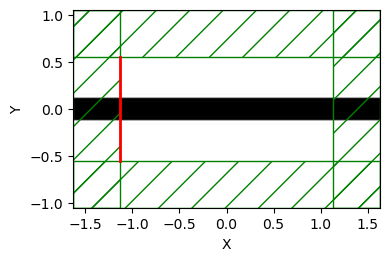

In [76]:
plt.figure(figsize=(4,3))
sim.plot2D()
plt.tight_layout()

FloatProgress(value=0.0, description='0% done ', max=50.0)

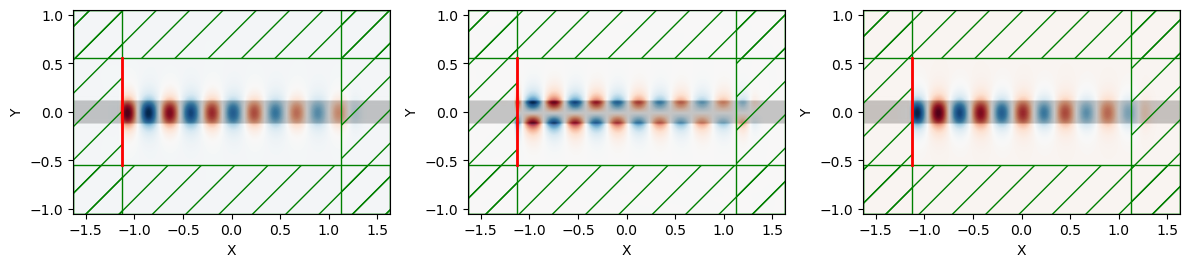

In [77]:
sim.reset_meep()
sim.run(until=50)
## stop_when_fields_decayed(dt, component, location, decay_by)
## keep incrementing runtime by dt
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, mp.Vector3(-0.1,0), 1e-6))

fig, axs = plt.subplots(1, 3, figsize=(12,4))
sim.plot2D(fields=mp.Ez, ax=axs[0])
sim.plot2D(fields=mp.Hx, ax=axs[1])
sim.plot2D(fields=mp.Hy, ax=axs[2])
fig.tight_layout()

In [93]:
sim.reset_meep()  # Restart the field propagation
side_view = mp.simulation.Volume(center=mp.Vector3(), size=mp.Vector3(lx,ly))

fig = plt.figure(figsize=(4,2.8), dpi=150)
plt.subplots_adjust(left=0.2)
Animate = mp.Animate2D(fields=mp.Ez, f=fig, realtime=False, normalize=True, output_plane=side_view)
sim.run(mp.at_every(1, Animate), until=120)
plt.close()

fps = 12  # Frames per second
filename = "./slab_waveguide_TE_Ez.mp4"
Animate.to_mp4(fps, filename)
Video(filename)

FloatProgress(value=0.0, description='0% done ', max=120.0)

FloatProgress(value=0.0, description='0% done ', max=10.0)

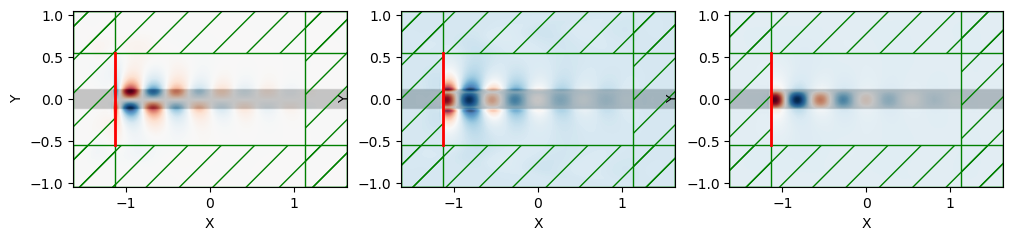

In [53]:
# 模態光源(空間) 瞬時高斯(時間)
sources = [mp.EigenModeSource(mp.GaussianSource(frequency=fcen, fwidth=0.1*fcen),
                              center = mp.Vector3(-sx/2+t_pml, 0),
                              size = mp.Vector3(y=sy-2*t_pml),
                              eig_match_freq = True,  # Default True, try to find a mode with the same frequency as the src property
                              eig_band = 1,  # integer or DiffractedPlaneWave class, default 1, index of the desired band where 1 denotes the lowest-frequency band at a given k point
                              eig_parity = mp.ODD_Y+mp.EVEN_Z)]  # mp.EVEN_Y+mp.ODD_Z for TE mode (Ez,Hy); mp.ODD_Y+mp.EVEN_Z for TM mode (Hz,Ey)

## Simulation object
sim = mp.Simulation(geometry = geometry,
                    cell_size = cell_size,
                    boundary_layers = pml_layers,
                    sources = sources,
                    resolution = resolution,
                    default_material = mp.Medium(index=n_SiO2))

sim.reset_meep()
sim.run(until=10)
## stop_when_fields_decayed(dt, component, location, decay_by)
## keep incrementing runtime by dt
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, mp.Vector3(-0.1,0), 1e-6))

fig, axs = plt.subplots(1, 3, figsize=(12,4))
sim.plot2D(fields=mp.Ex, ax=axs[0])
sim.plot2D(fields=mp.Ey, ax=axs[1])
sim.plot2D(fields=mp.Hz, ax=axs[2])
plt.show()